In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv("../data/Dataset_ecommerce.csv")

In [31]:
df.head(2)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali


In [29]:
df.tail(2)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal
541908,581587,2011-12-09 12:50:00,12680.0,SC9276,Toys,6,46.62,Ethiopia


In [35]:
#check for more info on df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [17]:
#Descriptive stat
df.describe(include ="all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [8]:
df.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [45]:
#drop missing values
df.dropna(inplace = True)

In [47]:
#convert to datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,4796.22
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,370.95
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   TotalPrice   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [51]:
df["TotalPrice"] = df["UnitPrice"] * df["Quantity"]

In [53]:
df.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,4796.22
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,370.95
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50


## Analysis by Country

# Exploratory Data Analysis


### Bivariate analysis of countries and total number of purchase


In [58]:
#Analysis by country 
quantity_per_country = df.groupby(["Country"])["Quantity"].sum().reset_index()
quantity_per_country = quantity_per_country.sort_values ("Quantity",ascending = False).reset_index()

In [60]:
quantity_per_country.head(5)

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206


In [62]:
#Visualize top 10 countries by sales
top_10_countries_by_sales= quantity_per_country.head(10)


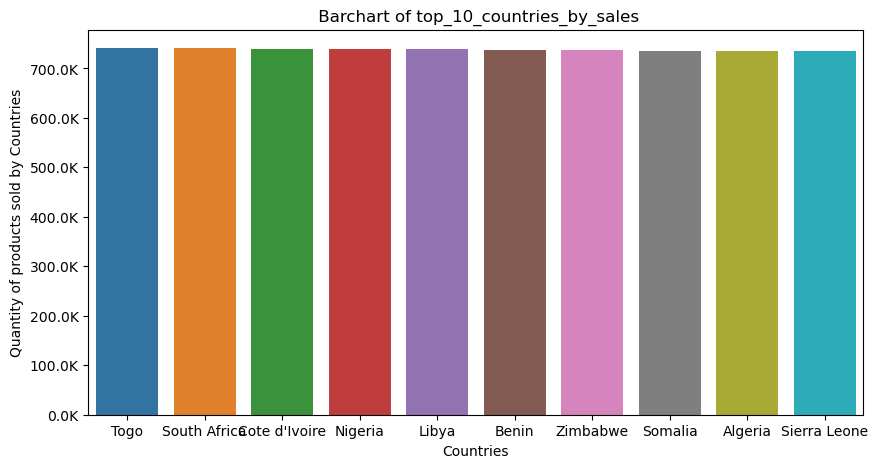

In [64]:
#Barchart of top_10_countries_by_sales
plt.figure(figsize=(10,5)) 

y_format = FuncFormatter(lambda x, _: f'{x / 1000:.1f}K')

ax = sns.barplot(x = "Country", y =  "Quantity", data =top_10_countries_by_sales)

ax.yaxis.set_major_formatter(y_format)


plt.xlabel("Countries")
plt.ylabel("Quantity of products sold by Countries")
plt.title(" Barchart of top_10_countries_by_sales")
plt.show()

In [65]:
#Visualize least_10_countries_by_sales 

least_10_countries_by_sales = quantity_per_country.tail(10)


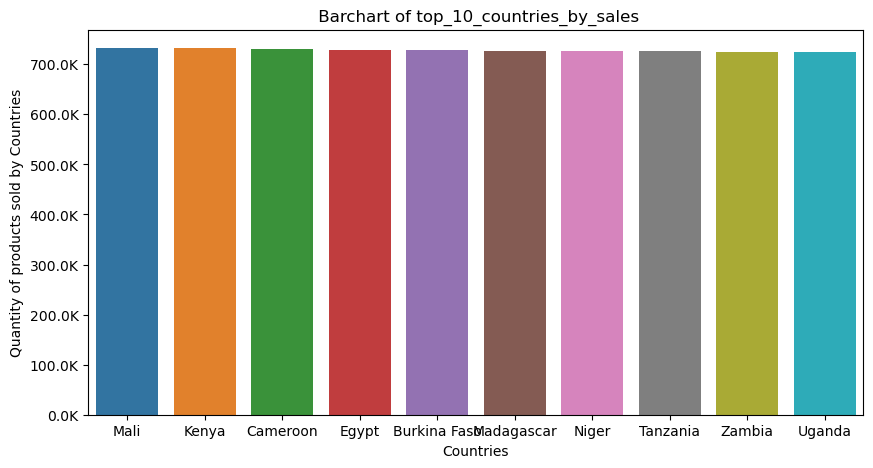

In [68]:
#Barchart of last_10_countries_by_sales

plt.figure(figsize=(10,5)) 

y_format = FuncFormatter(lambda x, _: f'{x / 1000:.1f}K')

ax = sns.barplot(x = "Country", y =  "Quantity", data =least_10_countries_by_sales)

ax.yaxis.set_major_formatter(y_format)

plt.xlabel("Countries")
plt.ylabel("Quantity of products sold by Countries")
plt.title(" Barchart of top_10_countries_by_sales")
plt.show()

### Analysis of customer by countries


In [71]:
country_to_customers = df.groupby(["Country"])["CustomerID"].nunique().reset_index()


In [73]:
country_to_customers = country_to_customers.sort_values("CustomerID", ascending = False).reset_index()
country_to_customers.rename(columns = {"CustomerID" : "Number of customers"}, inplace = True)

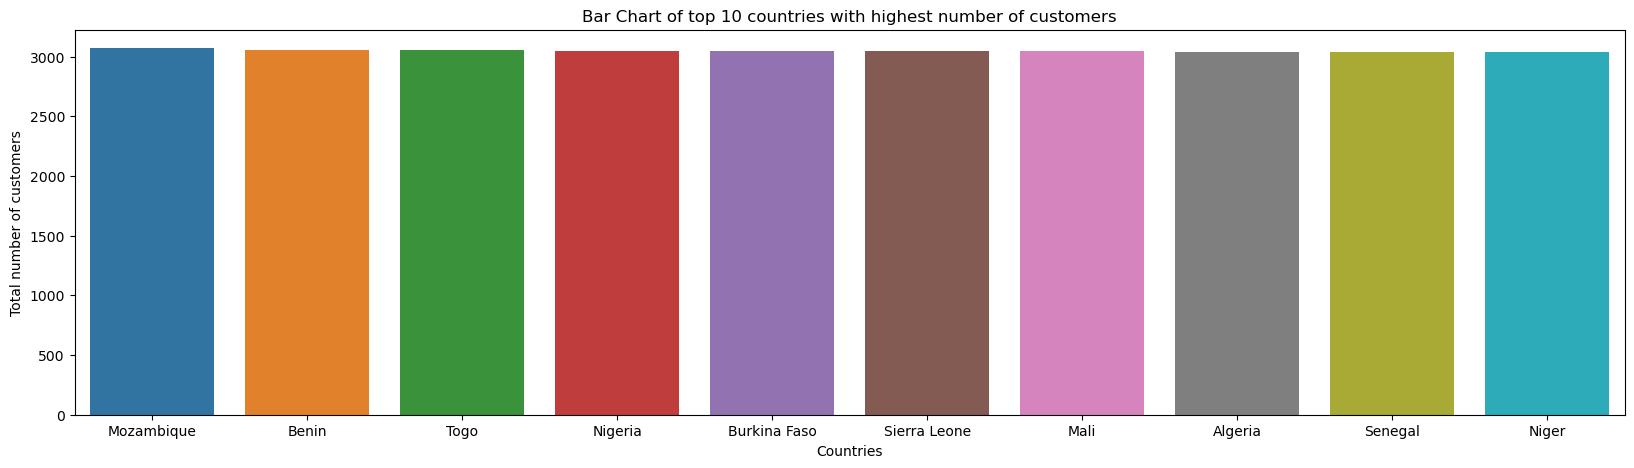

In [75]:
# Draw a plot of top 10 countries with highest number of customers (unique customerID)
top_countries_to_customers = country_to_customers.head(10)

# Create a bar chart from the selected data
plt.figure(figsize=(20, 5))

sns.barplot(x='Country', y='Number of customers', data= top_countries_to_customers)

plt.xlabel('Countries')
plt.ylabel('Total number of customers')
plt.title('Bar Chart of top 10 countries with highest number of customers')
plt.show()

In [76]:
# Group the data by month and calculate the total monthly sales
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

In [79]:
monthly_sales

InvoiceDate
2010-12    1350834
2011-01    1105886
2011-02    1033468
2011-03    1406617
2011-04    1175052
2011-05    1459981
2011-06    1402857
2011-07    1388119
2011-08    1387695
2011-09    2061181
2011-10    2559609
2011-11    3313177
2011-12     891630
Freq: M, Name: Quantity, dtype: int64

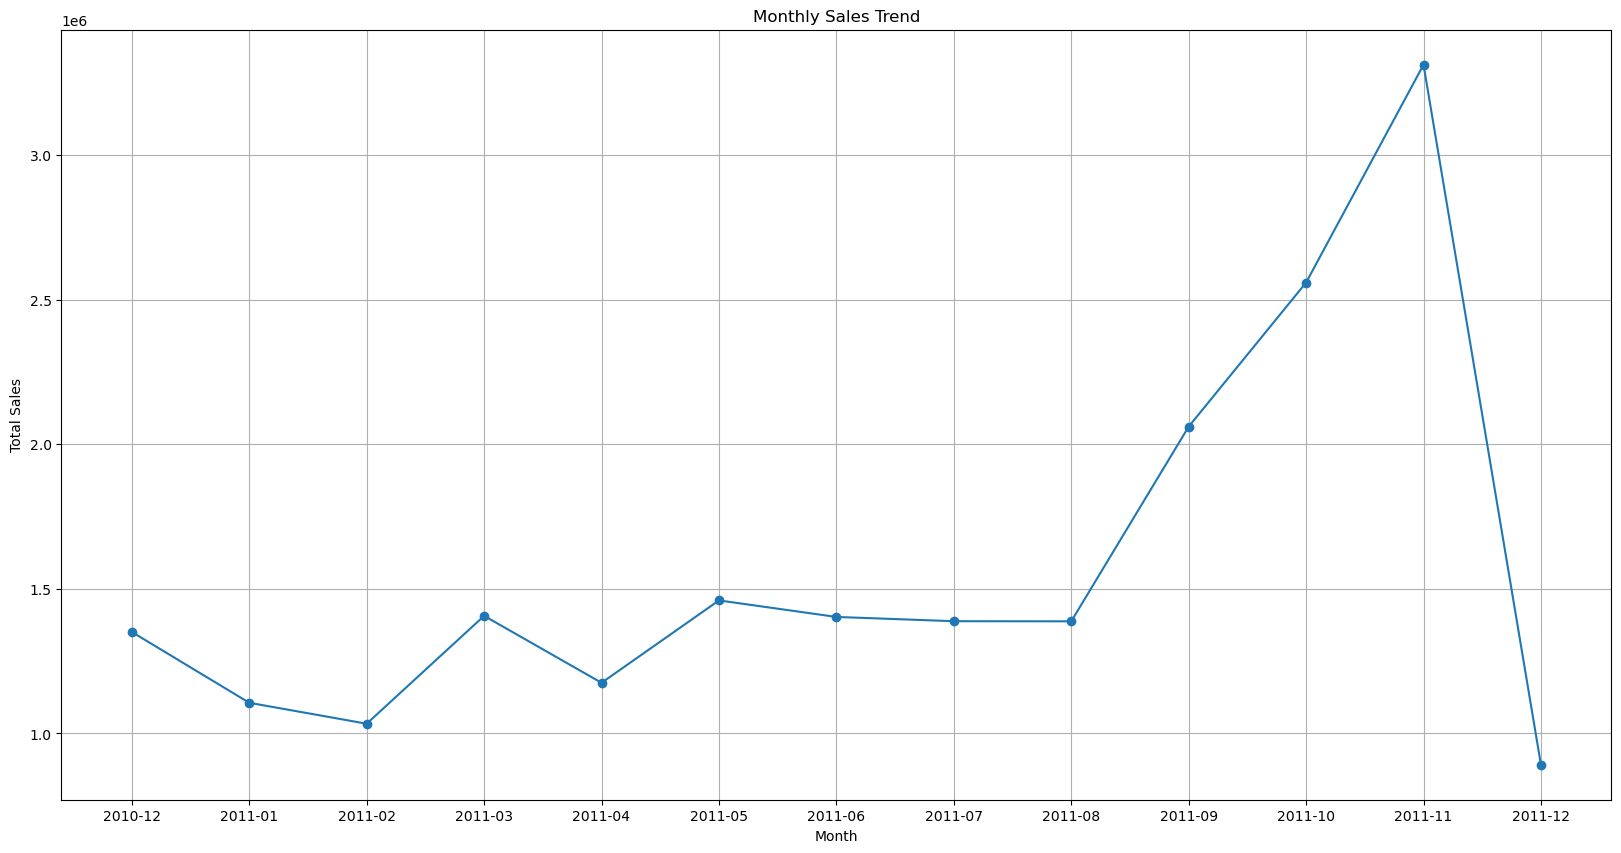

In [81]:

# Create a line chart
plt.figure(figsize=(20, 10))
plt.plot(monthly_sales.index.strftime('%Y-%m'), monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)

# Display the plot
plt.show()

In [83]:
#create Invoice month as new feature
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [88]:
df["InvoiceDate"]  = df["InvoiceDate"].apply(get_month)
df.tail()


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,913.25
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,8521.10
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,560.98
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,3592.35
541908,581587,2011-12-01,12680.0,SC9276,Toys,6,46.62,Ethiopia,279.72


In [92]:
def get_cohort_date(df):
    """ this function takes in the dataframe
        and returns the cohort date

        variables:
        data = dataframe
        cohort date = the first date they made a purchase
        """

    # assign the minimum date to all unique candidateID, i.e the first day they made a purchase
    data["cohort date"] = data.groupby("CustomerID")["InvoiceDate"].transform("min")

    return data["cohort date"]

In [100]:
#apply the function created to our dataframe and extract the 2 newly created column

df["cohort date"] = get_cohort_date(df)